# Assignment 1

In [2]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
plt.style.use('ggplot')

In [29]:
df=pd.read_csv('gm_2008_region.csv')
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


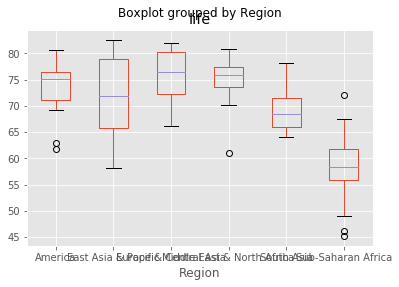

In [30]:
df.boxplot('life','Region')

In [35]:
df=pd.get_dummies(df)
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region_America,Region_East Asia & Pacific,Region_Europe & Central Asia,Region_Middle East & North Africa,Region_South Asia,Region_Sub-Saharan Africa
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,0,0,0,1,0,0
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,0,0,0,0,0,1
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,1,0,0,0,0,0
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,0,0,1,0,0,0
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,0,1,0,0,0,0


In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split as tts
X=df.drop('life',axis=1).values
Y=df.life.values

In [37]:
X_train,X_test,Y_train,Y_test=tts(X,Y,test_size=0.3,random_state=45)

In [38]:
lr=LinearRegression()
lr.fit(X_train,Y_train)
lr.score(X_test,Y_test)

0.9021781656695853

([0, 1, 2, 3, 4, 5], <a list of 6 Text xticklabel objects>)

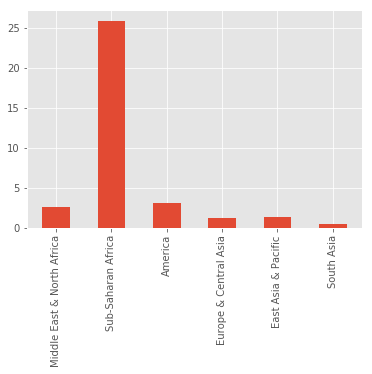

In [34]:
plt.bar(df['Region'],df['HIV'],width=.5)
plt.xticks(rotation='vertical')

## According to this data, most people in Sub Saharan Africa are borne to HIV

---------------------------------------------------------------------------------------------------------------------------

# Assignment 2

In [132]:
df=pd.read_csv('https://raw.githubusercontent.com/avs20/MSIT_ML_CLASS/master/datasets/house-votes-84-updated.csv')

In [148]:
df.replace('n',0,inplace=True)
df.replace('y',1,inplace=True)

In [150]:
df.head()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [176]:
df.replace('?',np.nan,inplace=True)

In [1]:
df.isnull().sum()

NameError: name 'df' is not defined

In [182]:
X=df.iloc[:,1:]
y=df.iloc[:,:1]
imp=Imputer('NaN','most_frequent',axis=0)
imp.fit(X)
X=imp.transform(X)

In [183]:
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

steps=[('imp',Imputer('NaN','most_frequent',axis=1)),
       ('knn',KNeighborsClassifier(n_neighbors=7))]

pipeline=Pipeline(steps)

X_train,X_test,y_train,y_test=tts(X,y,test_size=0.1,random_state=42)
print(X_train)
pipeline.fit(X_train,y_train.values.reshape(-1))
pipeline.score(X_test,y_test.values.reshape(-1))

[[0. 0. 1. ... 1. 0. 1.]
 [0. 1. 0. ... 1. 0. 1.]
 [0. 0. 1. ... 1. 0. 1.]
 ...
 [1. 1. 1. ... 0. 1. 1.]
 [1. 0. 1. ... 0. 1. 1.]
 [1. 0. 1. ... 1. 1. 1.]]


0.9090909090909091

## There is 91% accuracy in prediction

---------------------------------------------------------------------------------------------------------------------------

# Assignment 3

In [193]:
df=pd.read_csv('https://raw.githubusercontent.com/avs20/MSIT_ML_CLASS/master/datasets/white-wine.csv')

In [194]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
s=StandardScaler()
knn=KNeighborsClassifier(n_neighbors=7)
steps=[('s',s),('k',knn)]
pipeline=Pipeline(steps)
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.3,random_state=42)
pipeline.fit(x_train,y_train)
pipeline.score(x_test,y_test)

0.5435374149659864

In [195]:
knn2=KNeighborsClassifier(n_neighbors=7)
knn2.fit(x_train,y_train)
knn2.score(x_test,y_test)

0.45850340136054424

## Pipelined data prediction has a better accuracy than unpipelined data